In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('cz_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26016 entries, 0 to 26015
Data columns (total 10 columns):
CUSTOMER_ID         26016 non-null int64
ORDERS              26016 non-null int64
FIRST_ORDER_DATE    26016 non-null object
LAST_ORDER_DATE     26016 non-null object
TOTAL_CM2           26016 non-null object
NET_SALES           26016 non-null object
CM2_REL             26016 non-null object
ZTQ_ID              26016 non-null int64
START_DATE          26016 non-null object
EXPIRY_DATE         26016 non-null object
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,5310876,6,2017-08-04,2018-04-30,36.7350,345.5417,10.63,52,2017-10-22,2020-11-16
1,9447381,3,2017-09-05,2018-02-21,-1.2969,63.9503,-2.03,52,2014-11-14,2017-11-14
2,7707194,18,2017-07-03,2018-05-20,150.4096,1128.8371,13.32,52,2018-01-09,2021-02-01
3,9736300,10,2017-07-10,2018-05-08,44.3087,293.6925,15.09,54,2018-01-27,2021-01-27
4,2531585,6,2017-07-28,2018-05-04,126.5523,1396.2862,9.06,54,2018-03-11,2021-03-11


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


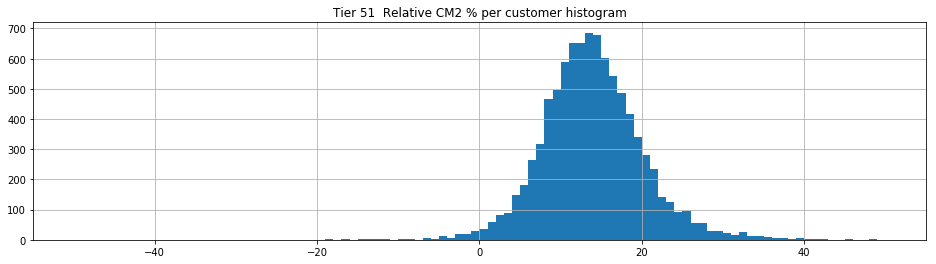

,CM2_REL
count,9166.00
mean,13.92
std,6.16
min,-18.97
25%,10.08
50%,13.61
75%,17.42
max,51.38


CM2% threshold >= 5  is the percentile 5.68
CM2% threshold >= 7  is the percentile 10.57
CM2% threshold >=  10.87  is the percentile 30 allowing us to stay with the 70% of our sample


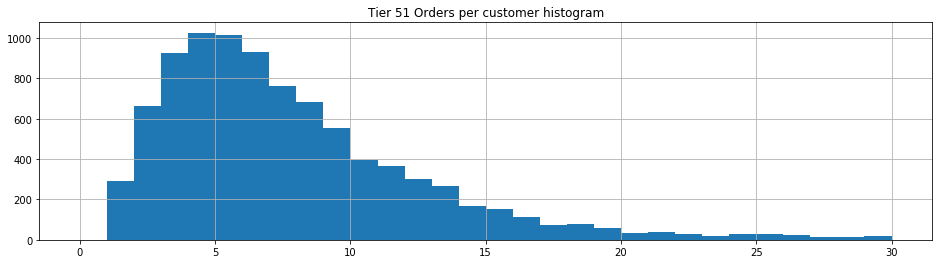

,ORDERS
count,9166.00
mean,7.58
std,5.78
min,1.00
25%,4.00
50%,6.00
75%,10.00
max,95.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  75.97  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  72.31  % from our customers
With CM2% threshold >=  10.87  and Orders >=  4.0  we keep eligible a  56.67  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


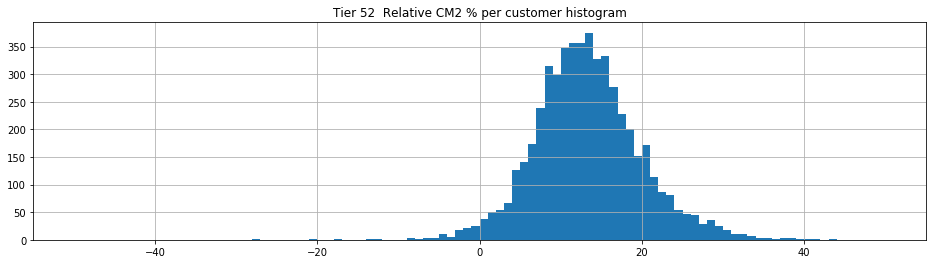

,CM2_REL
count,5310.00
mean,13.32
std,6.56
min,-27.66
25%,9.09
50%,12.97
75%,17.04
max,43.67


CM2% threshold >= 5  is the percentile 8.14
CM2% threshold >= 7  is the percentile 14.07
CM2% threshold >=  9.987  is the percentile 30 allowing us to stay with the 70% of our sample


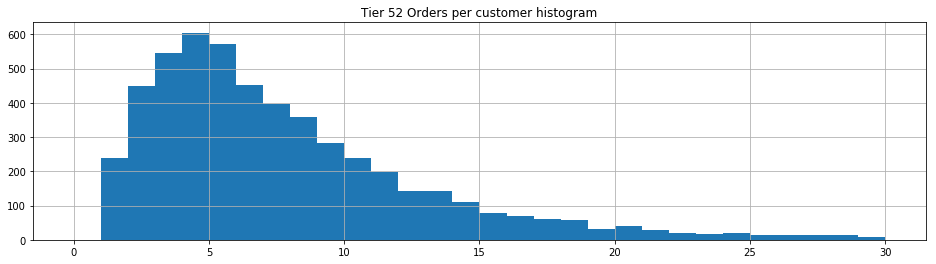

,ORDERS
count,5310.00
mean,8.00
std,8.94
min,1.00
25%,4.00
50%,6.00
75%,10.00
max,256.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  71.6  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  66.93  % from our customers
With CM2% threshold >=  9.987  and Orders >=  4.0  we keep eligible a  53.95  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


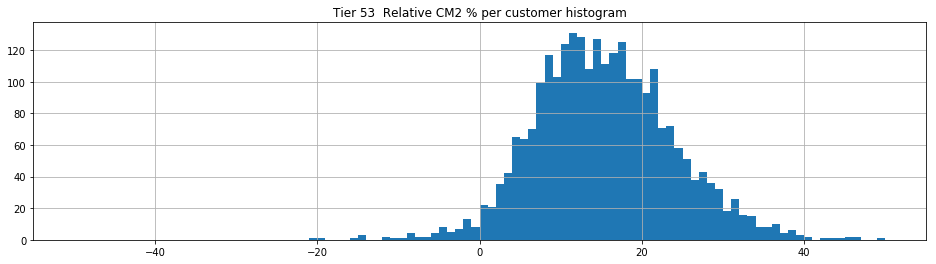

,CM2_REL
count,2603.00
mean,15.31
std,8.49
min,-20.77
25%,9.48
50%,14.88
75%,20.84
max,49.69


CM2% threshold >= 5  is the percentile 9.53
CM2% threshold >= 7  is the percentile 14.68
CM2% threshold >=  10.582  is the percentile 30 allowing us to stay with the 70% of our sample


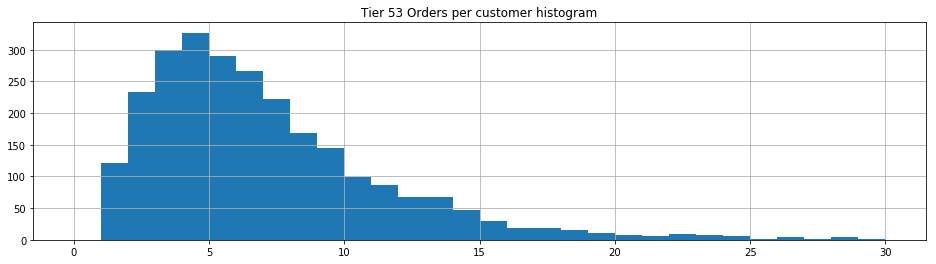

,ORDERS
count,2603.00
mean,6.78
std,5.09
min,1.00
25%,3.00
50%,6.00
75%,9.00
max,58.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  69.07  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  65.19  % from our customers
With CM2% threshold >=  10.582  and Orders >=  4.0  we keep eligible a  52.71  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


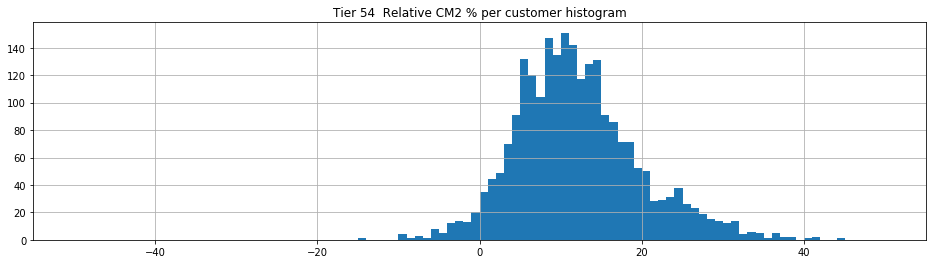

,CM2_REL
count,2377.00
mean,12.00
std,7.62
min,-14.79
25%,6.79
50%,11.25
75%,16.14
max,44.23


CM2% threshold >= 5  is the percentile 15.61
CM2% threshold >= 7  is the percentile 26.21
CM2% threshold >=  7.87  is the percentile 30 allowing us to stay with the 70% of our sample


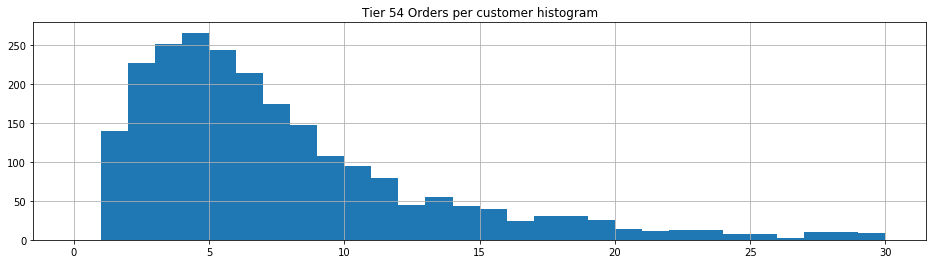

,ORDERS
count,2377.00
mean,7.99
std,8.67
min,1.00
25%,3.00
50%,6.00
75%,10.00
max,171.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  63.32  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  55.41  % from our customers
With CM2% threshold >=  7.87  and Orders >=  4.0  we keep eligible a  52.42  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


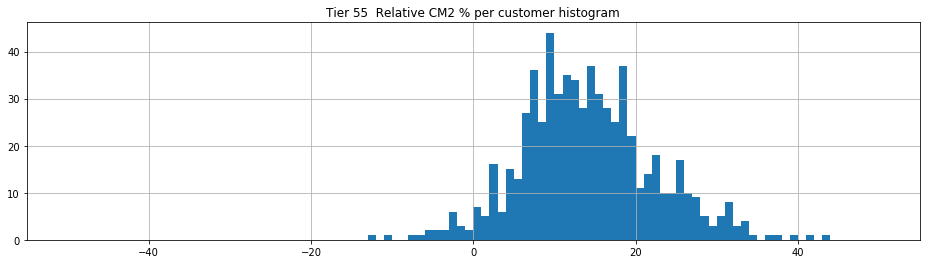

,CM2_REL
count,656.00
mean,14.05
std,8.12
min,-12.75
25%,8.77
50%,13.57
75%,18.60
max,43.24


CM2% threshold >= 5  is the percentile 10.67
CM2% threshold >= 7  is the percentile 16.77
CM2% threshold >=  9.61  is the percentile 30 allowing us to stay with the 70% of our sample


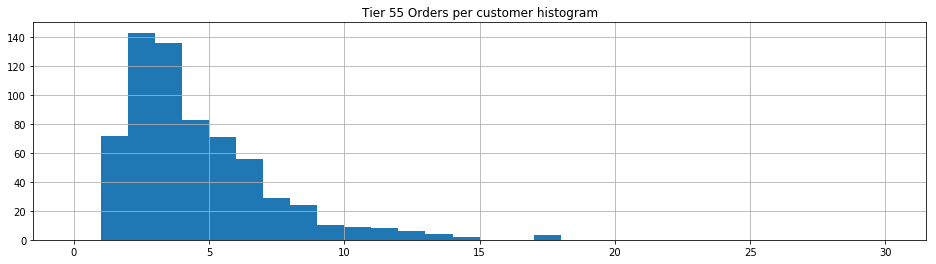

,ORDERS
count,656.00
mean,4.05
std,2.67
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,17.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  81.1  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  75.76  % from our customers
With CM2% threshold >=  9.61  and Orders >=  2.0  we keep eligible a  63.57  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


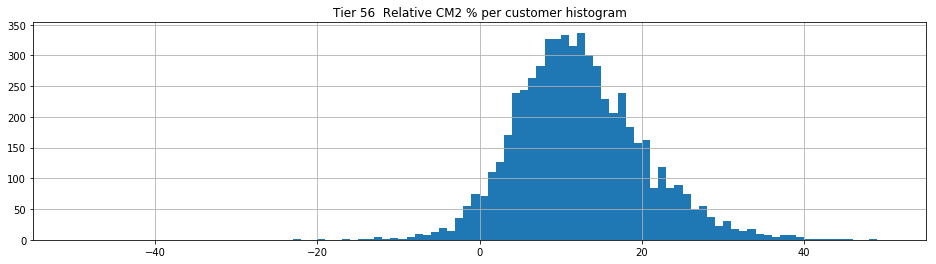

,CM2_REL
count,5904.00
mean,12.31
std,7.85
min,-22.86
25%,7.02
50%,11.66
75%,17.06
max,61.87


CM2% threshold >= 5  is the percentile 16.33
CM2% threshold >= 7  is the percentile 24.92
CM2% threshold >=  8.06  is the percentile 30 allowing us to stay with the 70% of our sample


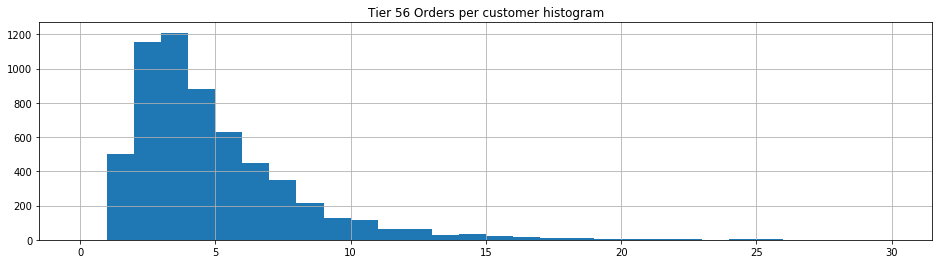

,ORDERS
count,5904.00
mean,4.45
std,3.43
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,81.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  61.18  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  55.15  % from our customers
With CM2% threshold >=  8.06  and Orders >=  3.0  we keep eligible a  51.32  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,5374.0,50.341817,23.543090,17.179975,35.012087,45.132083,59.270530,383.260925
52,2908.0,60.025886,32.079357,19.123520,39.297063,51.971314,71.391638,387.299560
53,1521.0,51.907760,24.774061,17.080075,35.947020,46.829867,61.529400,266.966333
54,1247.0,66.455382,41.868688,19.910150,42.435600,56.682240,78.424444,601.799100
55,282.0,42.482087,18.730426,17.024750,30.138557,38.210319,49.362275,125.253760
56,2768.0,52.165242,26.717097,15.947975,35.295915,45.555408,61.027102,310.014470


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,5374.0,14.006544,5.915856,-11.30,10.2725,13.740,17.4400,51.38
52,2908.0,13.321878,6.288338,-20.01,9.1400,13.070,16.9025,43.30
53,1521.0,15.663872,8.030912,-7.58,9.7800,15.460,20.9000,49.69
54,1247.0,12.289366,7.229740,-6.87,7.2300,11.470,16.3050,41.11
55,282.0,14.286383,6.757341,-2.42,9.7800,13.730,18.2100,41.00
56,2768.0,12.135914,7.004482,-10.18,7.4375,11.685,16.4350,45.72


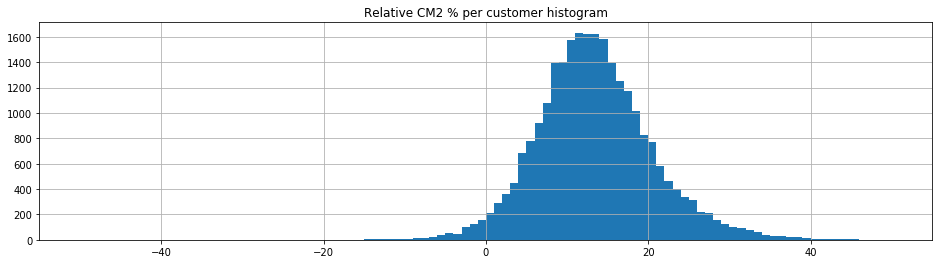

,CM2_REL
count,26016.00
mean,13.40
std,7.16
min,-27.66
25%,8.80
50%,12.99
75%,17.50
max,61.87


CM2% threshold >= 5  is the percentile 10.02
CM2% threshold >= 6  is the percentile 13.0
CM2% threshold >= 7  is the percentile 16.54
CM2% threshold >= 8  is the percentile 20.68
CM2% threshold >= 9  is the percentile 26.04
CM2% threshold >= 10  is the percentile 31.43
CM2% threshold >=  9.74  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

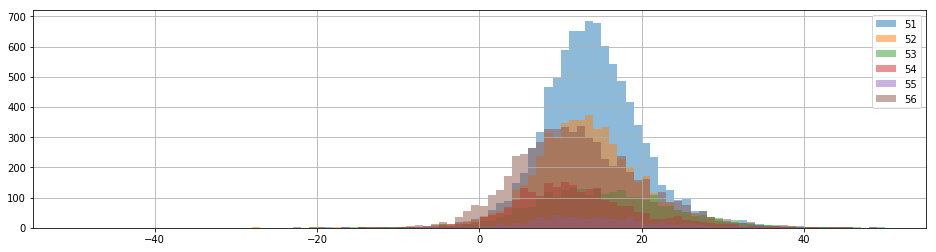

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   